# Winnining Wrestlers Entertainment

In this activity you will be taking four seperate csvs that were scraped down from a wrestling database, merging them together, and then creating charts to visualize a wrestler's wins and losses over the course of four years.

### Part 1 - Macho Merging

* You will likely need to perform three different merges over the course of this activity, changing the names of your columns as you go along.

In [1]:
#%matplotlib notebook

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
# Take in all of our wrestling data and read it into pandas
wrestling_2013 = "../Resources/WWE-Data-2013.csv"
wrestling_2014 = "../Resources/WWE-Data-2014.csv"
wrestling_2015 = "../Resources/WWE-Data-2015.csv"
wrestling_2016 = "../Resources/WWE-Data-2016.csv"

wrestlers_2013_df = pd.read_csv(wrestling_2013)
wrestlers_2014_df = pd.read_csv(wrestling_2014)
wrestlers_2015_df = pd.read_csv(wrestling_2015)
wrestlers_2016_df = pd.read_csv(wrestling_2016)

In [4]:
# Merge the first two datasets on "Wrestler" so that no data is lost (should be 182 rows)
combined_wrestlers_df = pd.merge(wrestlers_2013_df, wrestlers_2014_df, how='outer', on='Wrestler')
#combined_wrestlers_df.head()

In [5]:
# Rename our _x columns to "2013 Wins", "2013 Losses", and "2013 Draws"
combined_wrestlers_df = combined_wrestlers_df.rename(columns={"Wins_x":"2013 Wins", "Losses_x":"2013 Losses", "Draws_x":"2013 Draws"})

# Rename our _y columns to "2014 Wins", "2014 Losses", and "2014 Draws"
combined_wrestlers_df = combined_wrestlers_df.rename(columns={"Wins_y":"2014 Wins","Losses_y":"2014 Losses","Draws_y":"2014 Draws"})

#combined_wrestlers_df.head()

In [6]:
# Merge our newly combined dataframe with the 2015 dataframe
combined_wrestlers_df = pd.merge(combined_wrestlers_df, wrestlers_2015_df, how="outer", on="Wrestler")
#combined_wrestlers_df.head()

In [7]:
# Rename "wins", "losses", and "draws" to "2015 Wins", "2015 Losses", and "2015 Draws"
combined_wrestlers_df = combined_wrestlers_df.rename(columns={"Wins":"2015 Wins","Losses":"2015 Losses","Draws":"2015 Draws"})

#combined_wrestlers_df.head()

In [8]:
# Merge our newly combined dataframe with the 2016 dataframe
combined_wrestlers_df = pd.merge(combined_wrestlers_df, wrestlers_2016_df, how="outer", on="Wrestler")
#$combined_wrestlers_df.head()

In [9]:
# Rename "wins", "losses", and "draws" to "2016 Wins", "2016 Losses", and "2016 Draws"
combined_wrestlers_df = combined_wrestlers_df.rename(columns={"Wins":"2016 Wins","Losses":"2016 Losses","Draws":"2016 Draws"})

#combined_wrestlers_df.head()

In [10]:
# Replace all NaN values with 0 
combined_wrestlers_df = combined_wrestlers_df.fillna(0)

# Create a new column called "Total Wins" and add up each wrestler's wins per year to fill in the values
combined_wrestlers_df["Total Wins"] = combined_wrestlers_df["2013 Wins"] + combined_wrestlers_df["2014 Wins"] + combined_wrestlers_df["2015 Wins"] + combined_wrestlers_df["2016 Wins"]

# Create a new column called "Total Losses" and add up each wrestler's losses per year to fill in the values
combined_wrestlers_df["Total Losses"] = combined_wrestlers_df["2013 Losses"] + combined_wrestlers_df["2014 Losses"] + combined_wrestlers_df["2015 Losses"] + combined_wrestlers_df["2016 Losses"]

# Create a new column called "Total Draws" and add up each wrestler's draws per year to fill in the values
combined_wrestlers_df["Total Draws"] = combined_wrestlers_df["2013 Draws"] + combined_wrestlers_df["2014 Draws"] + combined_wrestlers_df["2015 Draws"] + combined_wrestlers_df["2016 Draws"]

# Create a new column called "Total Matches" and add up the total wins, losses, and draws for each wrestler to fill in the values
combined_wrestlers_df["Total Matches"] = combined_wrestlers_df["Total Wins"] + combined_wrestlers_df["Total Losses"] + combined_wrestlers_df["Total Draws"]

#combined_wrestlers_df.head()

In [11]:
# Create a new dataframe for those wrestlers who have wrestled at least 100 matches,
# have at least one win in 2013,
# and have at least one win in 2016
wrestled_over_hundred = combined_wrestlers_df.loc[(combined_wrestlers_df["Total Matches"] >= 100) &
                                                 (combined_wrestlers_df["2013 Wins"] > 0) &
                                                 (combined_wrestlers_df["2016 Wins"] > 0)]

# Set the index of this new dataframe to be the wrestlers names
wrestled_over_hundred = wrestled_over_hundred.set_index("Wrestler")

#wrestled_over_hundred.head()

### Part 3 - Charting Careers

* Create a variable and an input that asks the user what wrestler they would like to look for. 

* Store an individual wrestler's wins over time in a variable

* Store that same wrestler's losses over time in a variable as well

* Create a line chart that will plot this wrestler's wins and losses from 2013 to 2016

In [12]:
# Collect the user's input to search through our data frame
wrestler_name = input("What wrestler's career would you like to look at?")

What wrestler's career would you like to look at?John Cena


In [13]:
# Create a series that looks for a wrestler by name and then traces their wins from 2013 to 2016
wins_over_time = wrestled_over_hundred.loc[wrestler_name,["2013 Wins","2014 Wins", "2015 Wins", "2016 Wins"]]

# Create a series that looks for a wrestler by name and then traces their losses from 2013 to 2016
losses_over_time = wrestled_over_hundred.loc[wrestler_name,["2013 Losses","2014 Losses",
                                                            "2015 Losses", "2016 Losses"]]

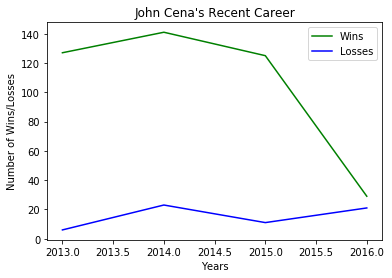

In [14]:
# Create a list of the years that we will use as our x axis
years = [2013,2014,2015,2016]

# Plot our line that will be used to track a wrestler's wins over the years
plt.plot(years, wins_over_time, color="green", label="Wins")

# Plot our line that will be used to track a wrestler's losses over the years
plt.plot(years, losses_over_time, color="blue", label="Losses")

# Place a legend on the chart in what matplotlib believes to be the "best" location
plt.legend(loc="best")

plt.title(wrestler_name + "'s Recent Career")
plt.xlabel("Years")
plt.ylabel("Number of Wins/Losses")

# Print our chart to the screen
plt.show()